In [342]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as snb

import sqlalchemy
from sqlalchemy.sql import func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

#Create and connect sqlite database

In [343]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [344]:
inspector = inspect(engine)
inspector.get_table_names()

['hawaii_measurements', 'hawaii_stations']

In [345]:
columns = inspector.get_columns('hawaii_measurements')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [346]:
columns = inspector.get_columns('hawaii_stations')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [347]:
engine.execute('SELECT * FROM hawaii_measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [348]:
engine.execute('SELECT * FROM hawaii_stations LIMIT 5').fetchall()

[(1, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (5, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [349]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.hawaii_measurements
Measurement

sqlalchemy.ext.automap.hawaii_measurements

In [350]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.hawaii_stations
Station

sqlalchemy.ext.automap.hawaii_stations

In [351]:
session = Session(engine)

#Query to retrieve the last 12 months of precipitation data

In [352]:
prcp_results = session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date.between('2016-08-23','2017-08-23')).order_by(Measurement.date.asc()).all()
prcp_results[:5]

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79)]

In [353]:
date = [row[0] for row in prcp_results]
precipitation = [row[1] for row in prcp_results]

In [354]:
prcp_df = pd.DataFrame(prcp_results, columns=['date', 'precipitation'])
prcp_df.set_index('date', inplace=True)
prcp_df.head(10)

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [355]:
prcp_df.tail(10)

,precipitation
date,
2017-08-21,0.00
2017-08-21,0.02
2017-08-21,0.56
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08


<IPython.core.display.Javascript object>


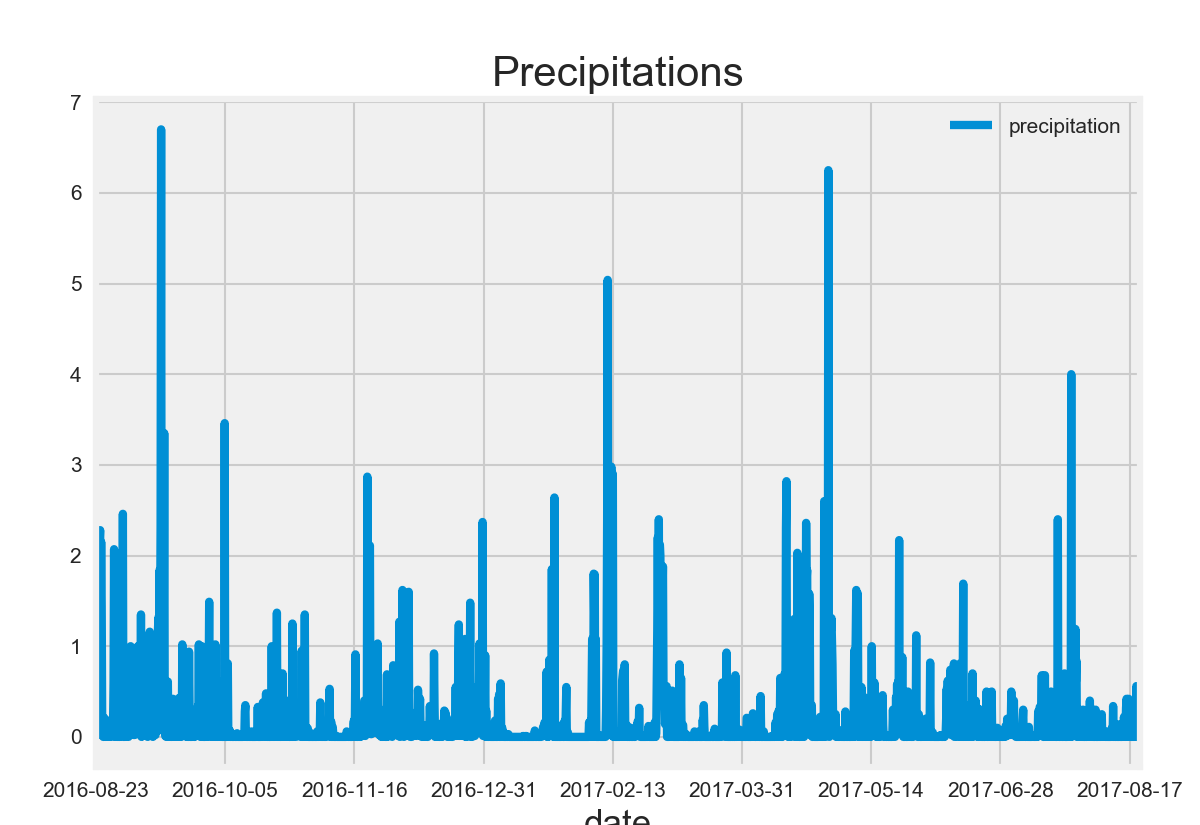

In [356]:
prcp_df.plot(title='Precipitations')
plt.show()

#Calculate the total number of stations

In [357]:
total_stations = session.query(func.count(Station.name)).scalar()
total_stations

9

#Query to list stations and observation counts in descending order

In [358]:
stations_tobs = session.query(Measurement.station, func.sum(Measurement.tobs))\
.group_by(Measurement.station).order_by(Measurement.tobs.desc()).all()
stations_tobs

[('USC00514830', 144913),
 ('USC00519523', 191698),
 ('USC00519397', 200205),
 ('USC00517948', 50943),
 ('USC00519281', 198652),
 ('USC00513117', 195940),
 ('USC00516128', 176029),
 ('USC00518838', 24855),
 ('USC00511918', 138191)]

#Station with the highest number of observations

#Query to retrieve the last 12 months of temperature observation data (tobs)

In [359]:
tobs_results = session.query(Measurement.station, Measurement.tobs)\
.filter(Measurement.date.between('2016-08-23','2017-08-23'),Measurement.station=='USC00519397').all()
tobs_results[:10]

[('USC00519397', 81),
 ('USC00519397', 79),
 ('USC00519397', 80),
 ('USC00519397', 79),
 ('USC00519397', 77),
 ('USC00519397', 78),
 ('USC00519397', 78),
 ('USC00519397', 79),
 ('USC00519397', 80),
 ('USC00519397', 81)]

In [360]:
station = [row[0] for row in tobs_results]
tobs = [row[1] for row in tobs_results]

In [361]:
tobs_df = pd.DataFrame(tobs_results, columns=['stations','tobs'])
tobs_df.set_index('stations', inplace=True)
tobs_df.head(10)

,tobs
stations,
USC00519397,81
USC00519397,79
USC00519397,80
USC00519397,79
USC00519397,77
USC00519397,78
USC00519397,78
USC00519397,79
USC00519397,80


<IPython.core.display.Javascript object>


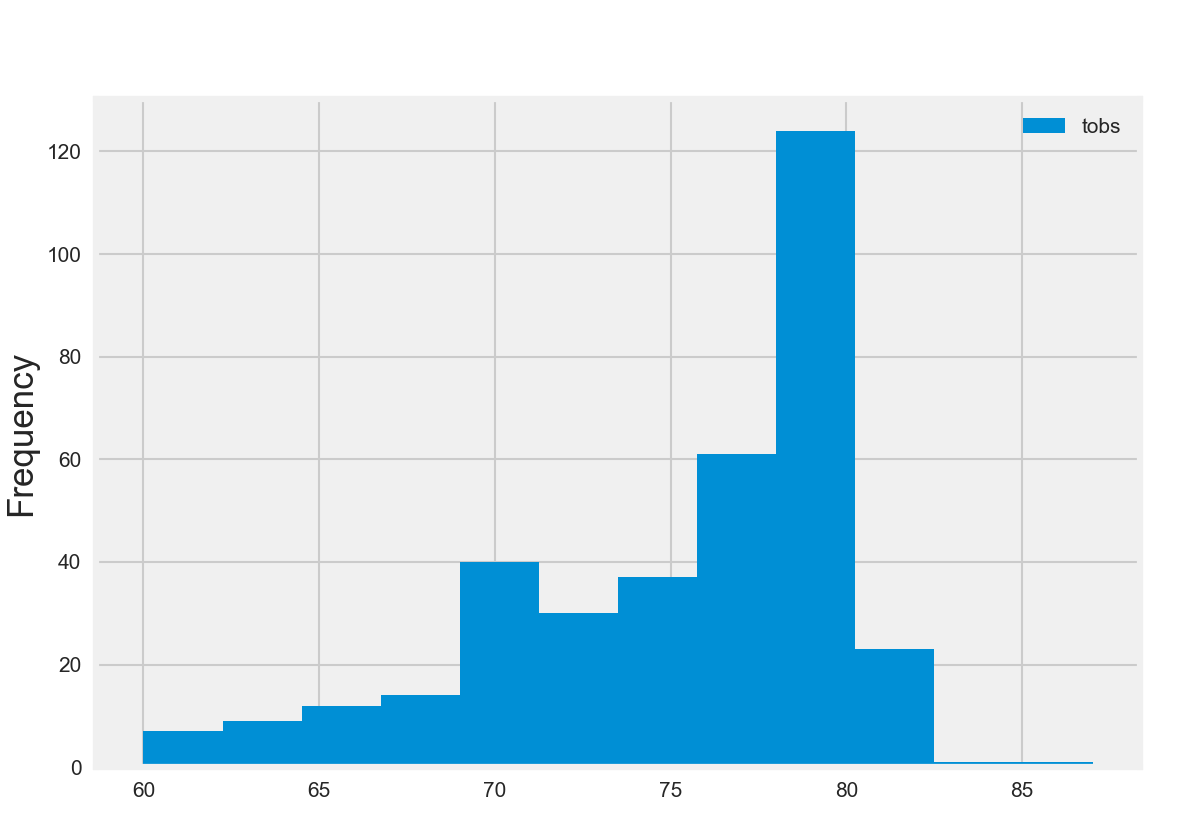

In [362]:
tobs_df.plot.hist(bins=12)
plt.show()